# Molecular Dynamics
In this fourth tutorial we are shifting gears, moving beyond DFT calculation towards classical interatomic potentials. We use the Large-scale Atomic/Molecular Massively Parallel Simulator (LAMMPS) which supports a number of classical interatomic potentials and modern machine-learned interatomic potentials. For the purpose of this tutorial we focus on classical interatomic potentials based on their computational efficiency. 

In analogy to the previous exercies both codes are available as open-source software for the Linux operation system and can be installed from the `conda` package manager using:
```
conda install -c conda-forge pyiron_atomistics lammps iprpy-data pyiron-data nglview
```
This command installs both packages, the required resources including the pseudo potentials and the `nglview` package to visualise atomistic structures in the jupyter environment. 

In addition, to the `Project` object from `pyiron_atomistics` also the numerical library `numpy` and the visualization library `matplotlib` are imported. The `Project` object behaves like a folder on the file system and adds the capability to create other `pyiron` objects like atomistic structures and simulation jobs. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pyiron_atomistics import Project

/Users/janssen/mambaforge/lib/python3.12/site-packages/nglview/__init__.py:12: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


## Energy Volume Curve
As a first step for working with interatomic potentials, we demonstrate the advantage of the generic interface the pyiron workflow framework provides. Meaning we can copy and paste the workflow developed in the previous tutorial to calculate the energy volume curve with DFT and apply it for the interatomic potential calculation.

A new `Project` object is created named `energy_volume_curve_md` to separate the calculation from the current tutorial and the previous. Any remaining calculation in the `energy_volume_curve_md` folder are removed using the `remove_jobs()` function, to provide a fresh start for every execution of the notebook.

In [2]:
pr = Project("energy_volume_curve_md")
pr.remove_jobs(recursive=True, silently=True)

0it [00:00, ?it/s]

An Aluminium bulk structure is created in analogy to the previous tutorial. As the classical interatomic potentials are fitted to reproduce experimental materials properties, there is no need to adjust the lattice constant, which simplifies the creation of the bulk structure:

In [3]:
structure_Al = pr.create.structure.ase.bulk("Al")

For the interatomic potential calculation it is not required to specify the plane wave energy cut-off or kpoint mesh, so we can remove the corresponding for-loop from the previous example. Instead we have to select an interatomic potential which supports the chemical elements required for the given simulation, in this case Aluminium. If no interatomic potential is provided pyiron automatically selects an interatomic potential from the [NIST database of interatomic potentials](https://www.ctcms.nist.gov/potentials/).

In [4]:
job_Al = pr.create.job.Lammps("lmp")
job_Al.structure = structure_Al
job_Al.potential = "1995--Angelo-J-E--Ni-Al-H--LAMMPS--ipr1"
job_Al.server.cores = 1

You can also list the available interatomic potentials for a given atomistic structure using the `list_potentials()` function of pyiron or alternatively us the `view_potentials()` function to receive a pandas Dataframe representation of all the available potentials, to select one. Again these potentials are provided from the [NIST database of interatomic potentials](https://www.ctcms.nist.gov/potentials/).

In [5]:
# job_Al.list_potentials()
job_Al.view_potentials()

,Config,Filename,Model,Name,Species,Citations
39,"[pair_style eam/alloy\n, pair_coeff * * NiAlH_jea.eam.alloy Ni Al H\n]",[potential_LAMMPS/1995--Angelo-J-E--Ni-Al-H--LAMMPS--ipr1/NiAlH_jea.eam.alloy],NISTiprpy,1995--Angelo-J-E--Ni-Al-H--LAMMPS--ipr1,"[Ni, Al, H]","[{'Angelo_1995': {'title': 'Trapping of hydrogen to lattice defects in nickel', 'journal': 'Modelling and Simulation in Materials Science and Engineering', 'volume': '3', 'pages': '289--307', 'num..."
40,"[pair_style eam/alloy\n, pair_coeff * * Farkas_Nb-Ti-Al_1996.eam.alloy Nb Ti Al\n]",[potential_LAMMPS/1996--Farkas-D--Nb-Ti-Al--LAMMPS--ipr1/Farkas_Nb-Ti-Al_1996.eam.alloy],NISTiprpy,1996--Farkas-D--Nb-Ti-Al--LAMMPS--ipr1,"[Nb, Ti, Al]","[{'Farkas_1996': {'title': 'Interatomic potentials for ternary Nb - Ti - Al alloys', 'journal': 'Modelling and Simulation in Materials Science and Engineering', 'volume': '4', 'pages': '23--32', '..."
43,"[pair_style eam/alloy\n, pair_coeff * * mg-al-set.eam.alloy Al Mg\n]",[potential_LAMMPS/1997--Liu-X-Y--Al-Mg--LAMMPS--ipr1/mg-al-set.eam.alloy],NISTiprpy,1997--Liu-X-Y--Al-Mg--LAMMPS--ipr1,"[Al, Mg]","[{'Liu_1997': {'title': 'Anisotropic surface segregation in Al-Mg alloys', 'journal': 'Surface Science', 'volume': '373', 'pages': '357--370', 'number': '2-3', 'doi': '10.1016/s0039-6028(96)01154-..."
46,"[pair_style eam/alloy\n, pair_coeff * * almg.liu.eam.alloy Al Mg\n]",[potential_LAMMPS/1998--Liu-X-Y--Al-Mg--LAMMPS--ipr1/almg.liu.eam.alloy],NISTiprpy,1998--Liu-X-Y--Al-Mg--LAMMPS--ipr1,"[Al, Mg]","[{'Liu_1998': {'title': 'Grain-boundary segregation in Al-10%Mg alloys at hot working temperatures', 'journal': 'Acta Materialia', 'volume': '46', 'pages': '3467--3476', 'number': '10', 'doi': '10..."
48,"[pair_style eam/alloy\n, pair_coeff * * al-cu-set.eam.alloy Al Cu\n]",[potential_LAMMPS/1999--Liu-X-Y--Al-Cu--LAMMPS--ipr1/al-cu-set.eam.alloy],NISTiprpy,1999--Liu-X-Y--Al-Cu--LAMMPS--ipr1,"[Al, Cu]","[{'Liu_1999': {'title': ""A new investigation of copper's role in enhancing Al-Cu interconnect electromigration resistance from an atomistic view"", 'journal': 'Acta Materialia', 'volume': '47', 'pa..."
...,...,...,...,...,...,...
948,"[pair_style kim Sim_LAMMPS_MEAM_JelinekGrohHorstemeyer_2012_AlSiMgCuFe__SM_656517352485_000\n, pair_coeff * * Al Si Mg Cu Fe\n]",[],OPENKIM,Sim_LAMMPS_MEAM_JelinekGrohHorstemeyer_2012_AlSiMgCuFe__SM_656517352485_000,"[Al, Si, Mg, Cu, Fe]","[{'B._2012': {'title': 'Modified embedded atom method potential for Al, Si, Mg, Cu, and Fe alloys', 'volume': '85', 'year': '2012', 'journal': 'Physical Review B', 'doi': '10.1103/PhysRevB.85.2451..."
958,"[pair_style kim Sim_LAMMPS_MEAM_PascuetFernandez_2015_AlU__SM_721930391003_000\n, pair_coeff * * Al U\n]",[],OPENKIM,Sim_LAMMPS_MEAM_PascuetFernandez_2015_AlU__SM_721930391003_000,"[Al, U]","[{'M.I._2015': {'title': '{A}tomic interaction of the {MEAM} type for the study of intermetallics in the {A}l–{U} alloy', 'volume': '467', 'year': '2015', 'journal': 'Journal of Nuclear Materials'..."
959,"[pair_style kim Sim_LAMMPS_MEAM_PascuetFernandez_2015_Al__SM_811588957187_000\n, pair_coeff * * Al\n]",[],OPENKIM,Sim_LAMMPS_MEAM_PascuetFernandez_2015_Al__SM_811588957187_000,[Al],"[{'M.I._2015': {'title': '{A}tomic interaction of the {MEAM} type for the study of intermetallics in the {A}l–{U} alloy', 'volume': '467', 'year': '2015', 'journal': 'Journal of Nuclear Materials'..."
979,"[pair_style kim Sim_LAMMPS_SMTBQ_SallesPolitanoAmzallag_2016_AlO__SM_853967355976_000\n, pair_coeff * * Al O\n]",[],OPENKIM,Sim_LAMMPS_SMTBQ_SallesPolitanoAmzallag_2016_AlO__SM_853967355976_000,"[Al, O]","[{'N._2016': {'title': 'Molecular dynamics study of high-pressure alumina polymorphs with a tight-binding variable-charge model', 'volume': '111', 'year': '2016', 'journal': 'Computational Materia..."


Once an interatomic potential is selected the calculation of the energy volume curve can again be done with the `Murnaghan` GenericMaster job as introduced in the previous tutorial, by assining the LAMMPS calculation job as reference job `ref_job`. The `Murnaghan` GenericMaster job is then executed by calling the `run()` function.

In [6]:
murn = pr.create.job.Murnaghan("murn_lmp")
murn.ref_job = job_Al
murn.run()

The job murn_lmp was saved and received the ID: 174
The job murn_lmp_0_9 was saved and received the ID: 175
The job murn_lmp_0_92 was saved and received the ID: 176
The job murn_lmp_0_94 was saved and received the ID: 177
The job murn_lmp_0_96 was saved and received the ID: 178
The job murn_lmp_0_98 was saved and received the ID: 179
The job murn_lmp_1_0 was saved and received the ID: 180
The job murn_lmp_1_02 was saved and received the ID: 181
The job murn_lmp_1_04 was saved and received the ID: 182
The job murn_lmp_1_06 was saved and received the ID: 183
The job murn_lmp_1_08 was saved and received the ID: 184
The job murn_lmp_1_1 was saved and received the ID: 185


For visualisation of the energy volume curve the built-in plotting routine of the `Murnaghan` GenericMaster job is used:

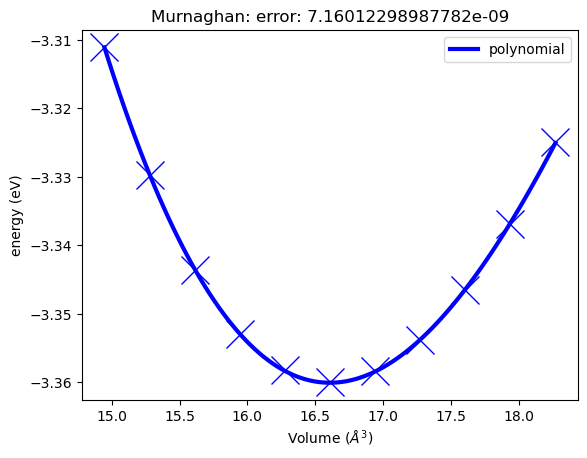

<Axes: title={'center': 'Murnaghan: error: 7.16012298987782e-09'}, xlabel='Volume ($\\AA^3$)', ylabel='energy (eV)'>

In [7]:
murn.plot()

In addition to the visualization of the energy volume curve, we can also leverage it to determine the equilibrium materials parameters, namely the equilibrium volume or lattice constant and the equilibrium bulk modulus. As we used the a primitive unit cell to improve the computational efficiency of our calculation, we have to multiply the calculated volume by the number of atoms in a regular unit cell - for face center cubic this is four `4` before taking the cubic square root: 

In [8]:
(4 * murn.content["output/equilibrium_volume"]) ** (1/3), murn.content["output/equilibrium_bulk_modulus"]

(4.049953713580792, 81.04044545831094)

A lattice constant of `4.05` Angstrom and a bulk modulus of `81` GPa are in good agreement with experimental measurements for example webelements gives the lattice constant as `4.05` Angstrom [1](https://www.webelements.com/aluminium/crystal_structure.html) and the bulk modulus as `76` GPa [2](https://www.webelements.com/aluminium/physics.html). 

## Molecular Dynamics Simulation
So minimize any confusion, we create a new project for the molecular dynamics calculation: 

In [9]:
pr = Project("molecular_dynamics")
pr.remove_jobs(recursive=True, silently=True)

0it [00:00, ?it/s]

For the molecular dynamics simulation example we construct an fcc Al crystal in a cubic supercell (`cubic=True`). We further repeat the supercell using the `repeat()` function three times in all three directions resulting in a total of 108 atoms. This larger simulation cell increases the statistical sampling. Finally, we plot the structure using [NGlview](http://nglviewer.org/nglview/latest/api.html).

In [10]:
basis = pr.create.structure.ase.bulk("Al", cubic=True)
supercell_3x3x3 = basis.repeat([3, 3, 3])
supercell_3x3x3.plot3d()

NGLWidget()

The project object allows to create various simulation job types. Here, we create a LAMMPS job.

In [11]:
job = pr.create.job.Lammps("Al_T400K")

Further, we specify a Molecular Dynamics simulation at $T=800$ K using the supercell structure created above.

In [12]:
job.structure = supercell_3x3x3
job.calc_md(temperature=400, pressure=0, n_ionic_steps=10000)

In analogy to the previous example of calculating the energy volume curve above, also for this example we select and Aluminium interatomic potential:

In [13]:
job.potential = "1995--Angelo-J-E--Ni-Al-H--LAMMPS--ipr1"

To run the LAMMPS simulation (locally) we now simply use:

In [14]:
job.run()

The job Al_T400K was saved and received the ID: 186


After the simulation has finished the information about the job can be accessed through the Project object.

In [15]:
job = pr["Al_T400K"]
job

{'groups': ['input', 'output'], 'nodes': ['DICT_VERSION', 'HDF_VERSION', 'NAME', 'OBJECT', 'TYPE', 'VERSION', 'executable', 'job_id', 'server', 'status']}

Printing the job object (note that in Jupyter we don't have to call a print statement if the variable/object is in the last line). The output lists the variables (nodes) and the directories (groups). To get a list of all variables stored in the generic output we type:

In [16]:
job.content["output/generic"]

{'groups': [], 'nodes': ['cells', 'energy_pot', 'energy_tot', 'forces', 'indices', 'natoms', 'positions', 'pressures', 'steps', 'temperature', 'unwrapped_positions', 'velocities', 'volume']}

An animated 3d plot of the MD trajectories is created with the `animate_structures()` function. 

In [17]:
job.animate_structures()

NGLWidget(max_frame=100)

To analyze the temperature evolution we plot it as function of the MD step.

/var/folders/9p/rztyv06d0xv4h26cyv8nrw3m0000gq/T/ipykernel_1868/3950441473.py:1: DeprecationWarning: pyiron_base.jobs.job.base.__getitem__ is deprecated: Use job.output for results, job.files to access files; job.content to access HDF storage and job.child_project to access children of master jobs..
  temperatures = job["output/generic/temperature"]
/var/folders/9p/rztyv06d0xv4h26cyv8nrw3m0000gq/T/ipykernel_1868/3950441473.py:2: DeprecationWarning: pyiron_base.jobs.job.base.__getitem__ is deprecated: Use job.output for results, job.files to access files; job.content to access HDF storage and job.child_project to access children of master jobs..
  steps = job["output/generic/steps"]


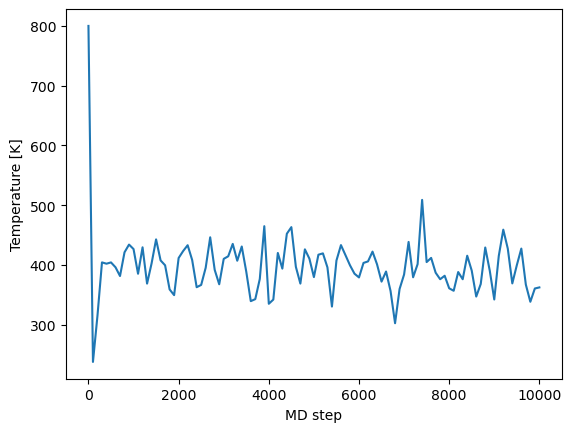

In [18]:
temperatures = job["output/generic/temperature"]
steps = job["output/generic/steps"]
plt.plot(steps, temperatures)
plt.xlabel("MD step")
plt.ylabel("Temperature [K]");

In the same way we can plot the trajectories in a 2D projection. This is helpful to identify if the atoms remain on their original lattice positions or if they started to diffuse or melt. In this case the sample remains solid as the individual atoms remain on their lattice positions.

<>:2: SyntaxWarning: invalid escape sequence '\A'
<>:3: SyntaxWarning: invalid escape sequence '\A'
<>:2: SyntaxWarning: invalid escape sequence '\A'
<>:3: SyntaxWarning: invalid escape sequence '\A'
/var/folders/9p/rztyv06d0xv4h26cyv8nrw3m0000gq/T/ipykernel_1868/728902178.py:2: SyntaxWarning: invalid escape sequence '\A'
  plt.xlabel('x [$\AA$]')
/var/folders/9p/rztyv06d0xv4h26cyv8nrw3m0000gq/T/ipykernel_1868/728902178.py:3: SyntaxWarning: invalid escape sequence '\A'
  plt.ylabel('y [$\AA$]')


Text(0, 0.5, 'y [$\\AA$]')

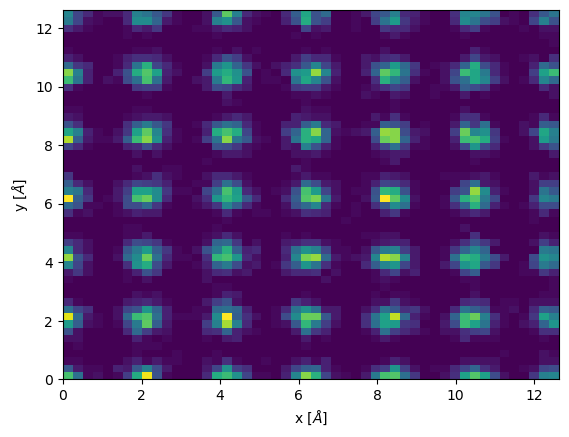

In [19]:
plt.hist2d(job.output.positions[:, :, 0].flatten(), job.output.positions[:, :, 1].flatten(), bins=50)
plt.xlabel('x [$\AA$]')
plt.ylabel('y [$\AA$]')

## Thermal Expansion

To run the MD simulation for various temperatures we can simply loop over the desired temperature values.

In [20]:
for temperature in np.arange(200, 1200, 200):
    job = pr.create.job.Lammps("Al_T{}K".format(int(temperature)))
    job.structure = supercell_3x3x3
    job.potential = "1995--Angelo-J-E--Ni-Al-H--LAMMPS--ipr1"
    job.calc_md(temperature=temperature, pressure=0, n_ionic_steps=10000)
    job.run()

The job Al_T200K was saved and received the ID: 187


2025-11-22 13:27:34,925 - pyiron_log - WARNING - The job Al_T400K is being loaded instead of running. To re-run use the argument 'delete_existing_job=True in create_job'


The job Al_T600K was saved and received the ID: 188
The job Al_T800K was saved and received the ID: 189
The job Al_T1000K was saved and received the ID: 190


To inspect the list of jobs in our current project we type (note that the existing job from the previous excercise at $T=800$ K has been recognized and not run again):

In [21]:
pr

{'groups': [], 'nodes': ['Al_T400K', 'Al_T200K', 'Al_T600K', 'Al_T800K', 'Al_T1000K']}

We can now iterate over the jobs and extract volume and mean temperature.

In [22]:
vol_lst, temp_lst = [], []
for job in pr.iter_jobs(convert_to_object=False):
    volumes = job.content["output/generic/volume"]
    temperatures = job.content["output/generic/temperature"]
    temp_lst.append(np.mean(temperatures[20:]))
    vol_lst.append(np.mean(volumes[20:]))

  0%|          | 0/5 [00:00<?, ?it/s]

Then we can use the extracted information to plot the thermal expansion, calculated within the $NPT$ ensemble. For plotting the temperature values in ascending order the volume list is mapped to the sorted temperature list.

<>:11: SyntaxWarning: invalid escape sequence '\A'
<>:11: SyntaxWarning: invalid escape sequence '\A'
/var/folders/9p/rztyv06d0xv4h26cyv8nrw3m0000gq/T/ipykernel_1868/1675732089.py:11: SyntaxWarning: invalid escape sequence '\A'
  plt.ylabel("Volume [$\AA^3$]");


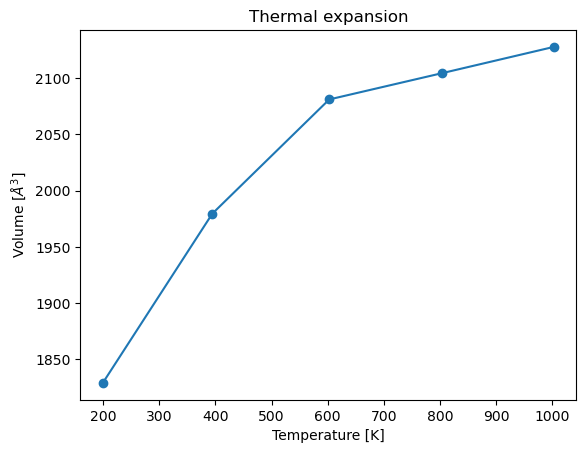

In [23]:
plt.figure()
vol_lst[:] = [vol_lst[np.argsort(temp_lst)[k]] for k in range(len(vol_lst))]
plt.plot(
    sorted(temp_lst),
    vol_lst,
    linestyle="-",
    marker="o",
)
plt.title("Thermal expansion")
plt.xlabel("Temperature [K]")
plt.ylabel("Volume [$\AA^3$]");

## Compare Interatomic Potentials

We extend the previous example and compute the thermal expansion for three of the available aluminum potentials. First, let us create a new pyiron project named 'Al_potentials'. We can use the information of the previously run job 'Al_T200K' of the 'first_steps' project to find all the compatible potentials.

In [24]:
pr = Project("thermal_expansion")
pr.remove_jobs(recursive=True, silently=True)

0it [00:00, ?it/s]

In [25]:
pot_lst = pr["../molecular_dynamics/Al_T200K"].to_object().list_potentials()[:3]
pot_lst

['1995--Angelo-J-E--Ni-Al-H--LAMMPS--ipr1',
 '1996--Farkas-D--Nb-Ti-Al--LAMMPS--ipr1',
 '1997--Liu-X-Y--Al-Mg--LAMMPS--ipr1']

Note again that `list_potentials()` automatically only returns the potentials that are compatible with the structure (chemical species) and the job type.

We can now loop over the selected potentials and run the MD simulation for the desired temperature values for any of the potentials.

In [26]:
for pot in pot_lst:
    print("Interatomic potential used: ", pot)
    pr_pot = pr.create_group(pot)
    for temperature in np.arange(200, 1200, 200):
        job = pr_pot.create.job.Lammps("Al_T{}K".format(int(temperature)))
        job.structure = supercell_3x3x3
        job.potential = pot
        job.calc_md(temperature=temperature, pressure=0, n_ionic_steps=10000)
        job.run()

Interatomic potential used:  1995--Angelo-J-E--Ni-Al-H--LAMMPS--ipr1
The job Al_T200K was saved and received the ID: 191
The job Al_T400K was saved and received the ID: 192
The job Al_T600K was saved and received the ID: 193
The job Al_T800K was saved and received the ID: 194
The job Al_T1000K was saved and received the ID: 195
Interatomic potential used:  1996--Farkas-D--Nb-Ti-Al--LAMMPS--ipr1
The job Al_T200K was saved and received the ID: 196
The job Al_T400K was saved and received the ID: 197
The job Al_T600K was saved and received the ID: 198
The job Al_T800K was saved and received the ID: 199
The job Al_T1000K was saved and received the ID: 200
Interatomic potential used:  1997--Liu-X-Y--Al-Mg--LAMMPS--ipr1
The job Al_T200K was saved and received the ID: 201
The job Al_T400K was saved and received the ID: 202
The job Al_T600K was saved and received the ID: 203
The job Al_T800K was saved and received the ID: 204
The job Al_T1000K was saved and received the ID: 205


With the `pr.create_group()` command a new subproject (directory) is created named here by the name of the potential. 

For any particular potential the thermal expansion data can be obtained again by looping over the jobs performed using that potential. To obtain the thermal expansion curves for all the potentials used we can simply iterate over the subprojects (directories) created above by using the `pr.iter_groups()` command.

<>:14: SyntaxWarning: invalid escape sequence '\A'
<>:14: SyntaxWarning: invalid escape sequence '\A'
/var/folders/9p/rztyv06d0xv4h26cyv8nrw3m0000gq/T/ipykernel_1868/2858725511.py:14: SyntaxWarning: invalid escape sequence '\A'
  plt.ylabel("Volume [$\AA^3$]");


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

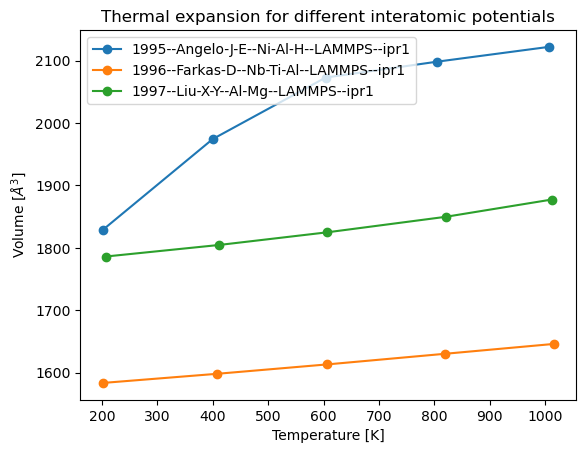

In [27]:
for p in pr.iter_groups():
    vol_lst, temp_lst = [], []
    for out in p.iter_jobs(path="output/generic"):
        volumes = out["volume"]
        temperatures = out["temperature"]
        temp_lst.append(np.mean(temperatures[:-20]))
        vol_lst.append(np.mean(volumes[:-20]))
    # Plot only if there is a job in that group
    if len(p.get_job_ids()) > 0:
        plt.plot(temp_lst, vol_lst, linestyle="-", marker="o", label=p.name)
plt.legend(loc="best")
plt.title("Thermal expansion for different interatomic potentials")
plt.xlabel("Temperature [K]")
plt.ylabel("Volume [$\AA^3$]");

## Conclusion
This fourth tutorial introduced classical interatomic potential simulations with the LAMMPS simulation code. It highlighted how the generic interface of the pyiron workflow framework allows reusing the same functionality originally developed for DFT simulation for interatomic potential simulation. Furthermore, the thermal expansion was calculated for three interatomic potentials. This example highlights how to iteratively construct a pyiron project, starting by the calculation of the equilibrated volume at a given temperature, followed by a first for-loop over different temperatures and finally a loop over different interatomic potentials. This iterative approach of extending simulation protocols is a key feature of the pyiron workflow framework to enable data-driven materials science.  

## Exercises
* Identify a material suitable for additive manufacturing by searching for a low thermal expansion and a high bulk modulus. For example compare the thermal expansion and bulk modulus of gold, silver and copper to aluminium and explain which of the four elements you would suggest for additive manufacturing. A similar study was recently published for high entropy alloys in [Sk Md A.A. Alvi, et al. Acta Materialia, 289 (2025)](https://doi.org/10.1016/j.actamat.2025.120908).